# Library

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data

In [289]:
df = pd.read_csv('CarData.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995.0,5.0,65.0


# Data Processing

In [290]:
df = df.drop(columns='Model')

In [291]:
df.columns = df.columns.str.strip()

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              1979 non-null   float64
 11  Seating Capacity    1995 non-null   float64
 12  Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 209.2+ KB


In [293]:
df.isna().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [294]:
missingval_col = ['Engine', 'Seating Capacity', 'Fuel Tank Capacity']

imputer = KNNImputer(n_neighbors=5)
df[missingval_col] = imputer.fit_transform(df[missingval_col])

In [295]:
target_col = df.select_dtypes(include=['float', 'int'])
def outlier_handler(df, col, threshold=2):
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())  # Calculate Z-scores for the specified column
    df = df[z_scores < threshold]  # Keep rows where Z-score is below the threshold for the column
    return df

for col in target_col:
    df = outlier_handler(df, col) 

df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
5,Maruti Suzuki,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,Hyundai,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396.0,5.0,45.0
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197.0,5.0,43.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0


In [296]:
df.describe()

,Price,Year,Kilometer,Engine,Seating Capacity,Fuel Tank Capacity
count,1.520000e+03,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,1.153214e+06,2016.630921,49017.890132,1466.393720,5.005819,46.964924
std,1.149336e+06,2.981614,27128.124393,369.079685,0.179802,10.111296
min,1.149990e+05,2010.000000,0.000000,793.000000,4.000000,27.000000
25%,4.450000e+05,2014.000000,28000.000000,1197.000000,5.000000,40.000000
50%,6.950000e+05,2017.000000,48000.000000,1461.000000,5.000000,45.000000
75%,1.400000e+06,2019.000000,68202.750000,1692.575543,5.000000,55.000000
max,6.500000e+06,2022.000000,158000.000000,2498.000000,6.000000,71.000000


In [297]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
5,Maruti Suzuki,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,Hyundai,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396.0,5.0,45.0
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197.0,5.0,43.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0


# Exploratory Data Analysis

In [298]:
df_copy = df.copy()

numerical_col = ['Price', 'Year', 'Kilometer', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']
categorical_col = ['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type']

## Data Distribution and Box Plot

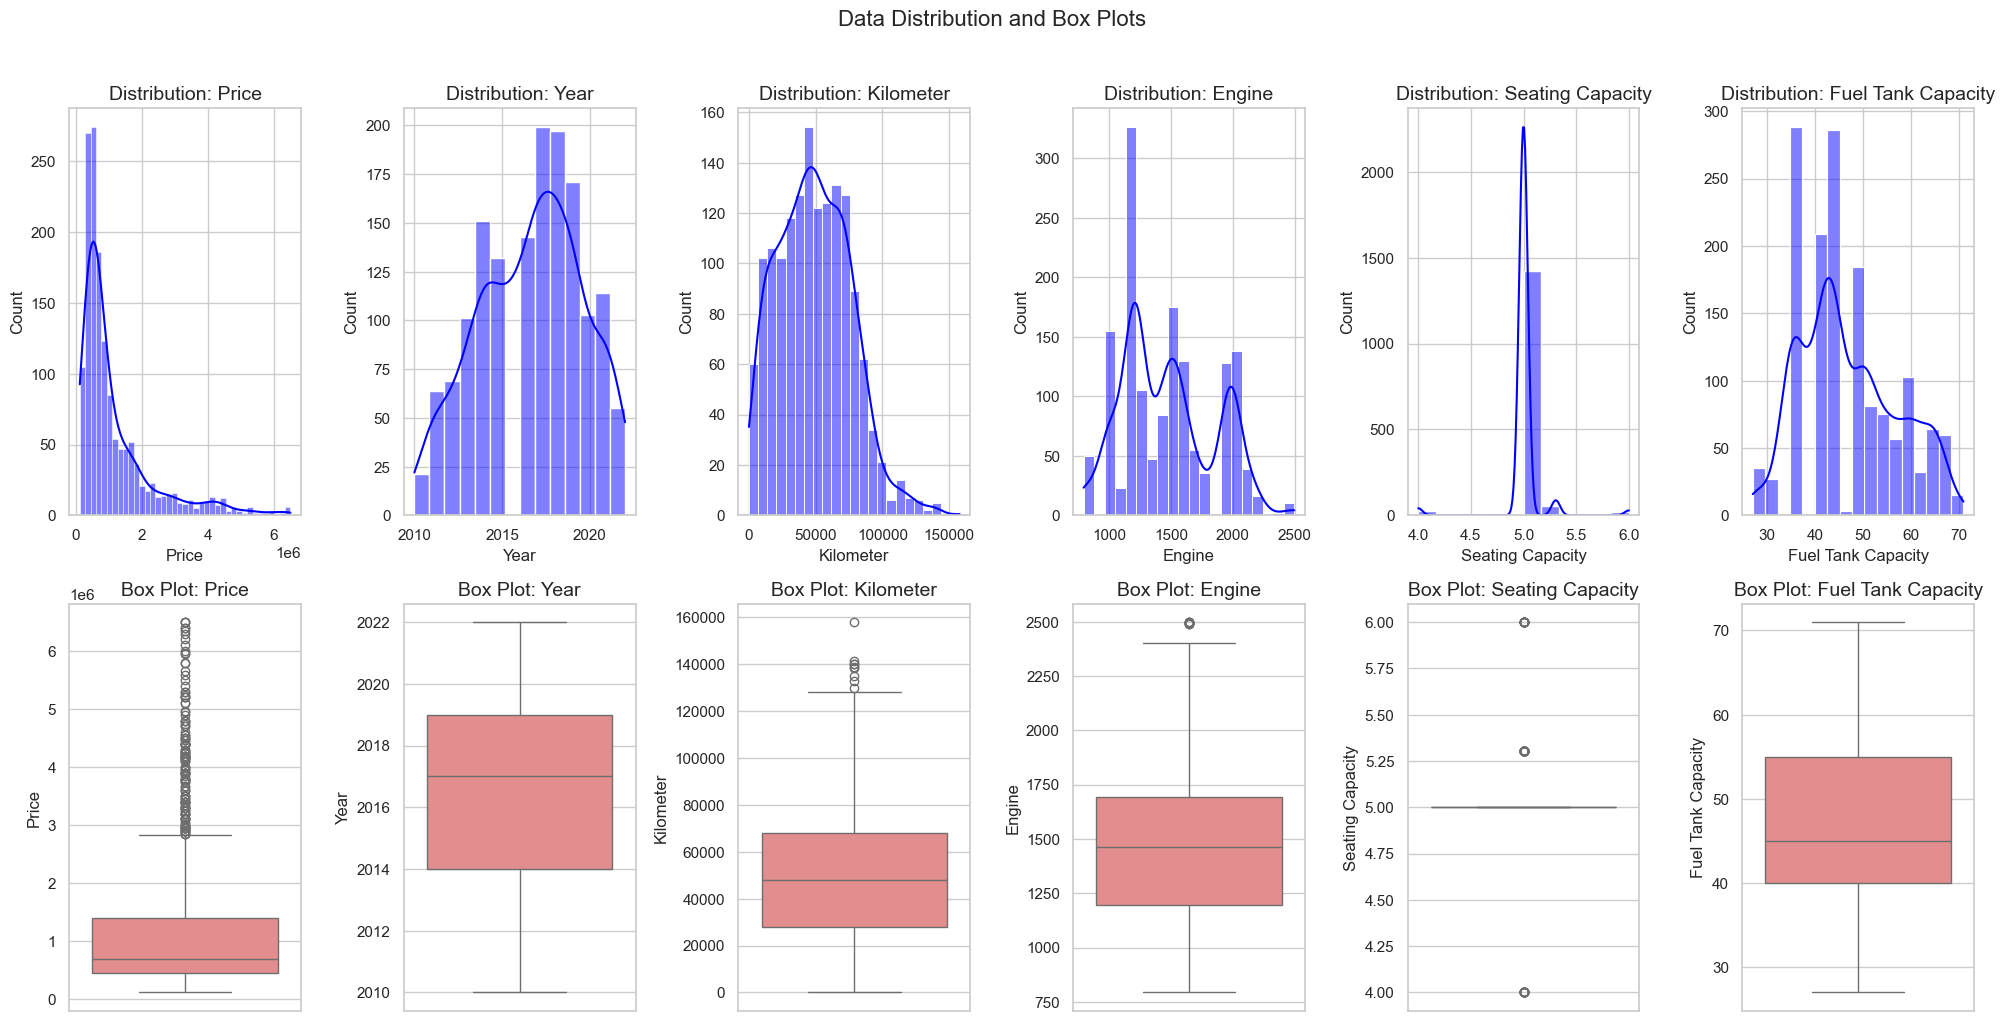

In [299]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=len(numerical_col), figsize=(20, 10))
fig.suptitle("Data Distribution and Box Plots", fontsize=16, y=1.02)

for i, col in enumerate(numerical_col):
    # Distribution Plot
    sns.histplot(df_copy[col], kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Distribution: {col}", fontsize=14)
    
    # Box Plot
    sns.boxplot(y=df_copy[col], ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"Box Plot: {col}", fontsize=14)

plt.tight_layout()
plt.show()

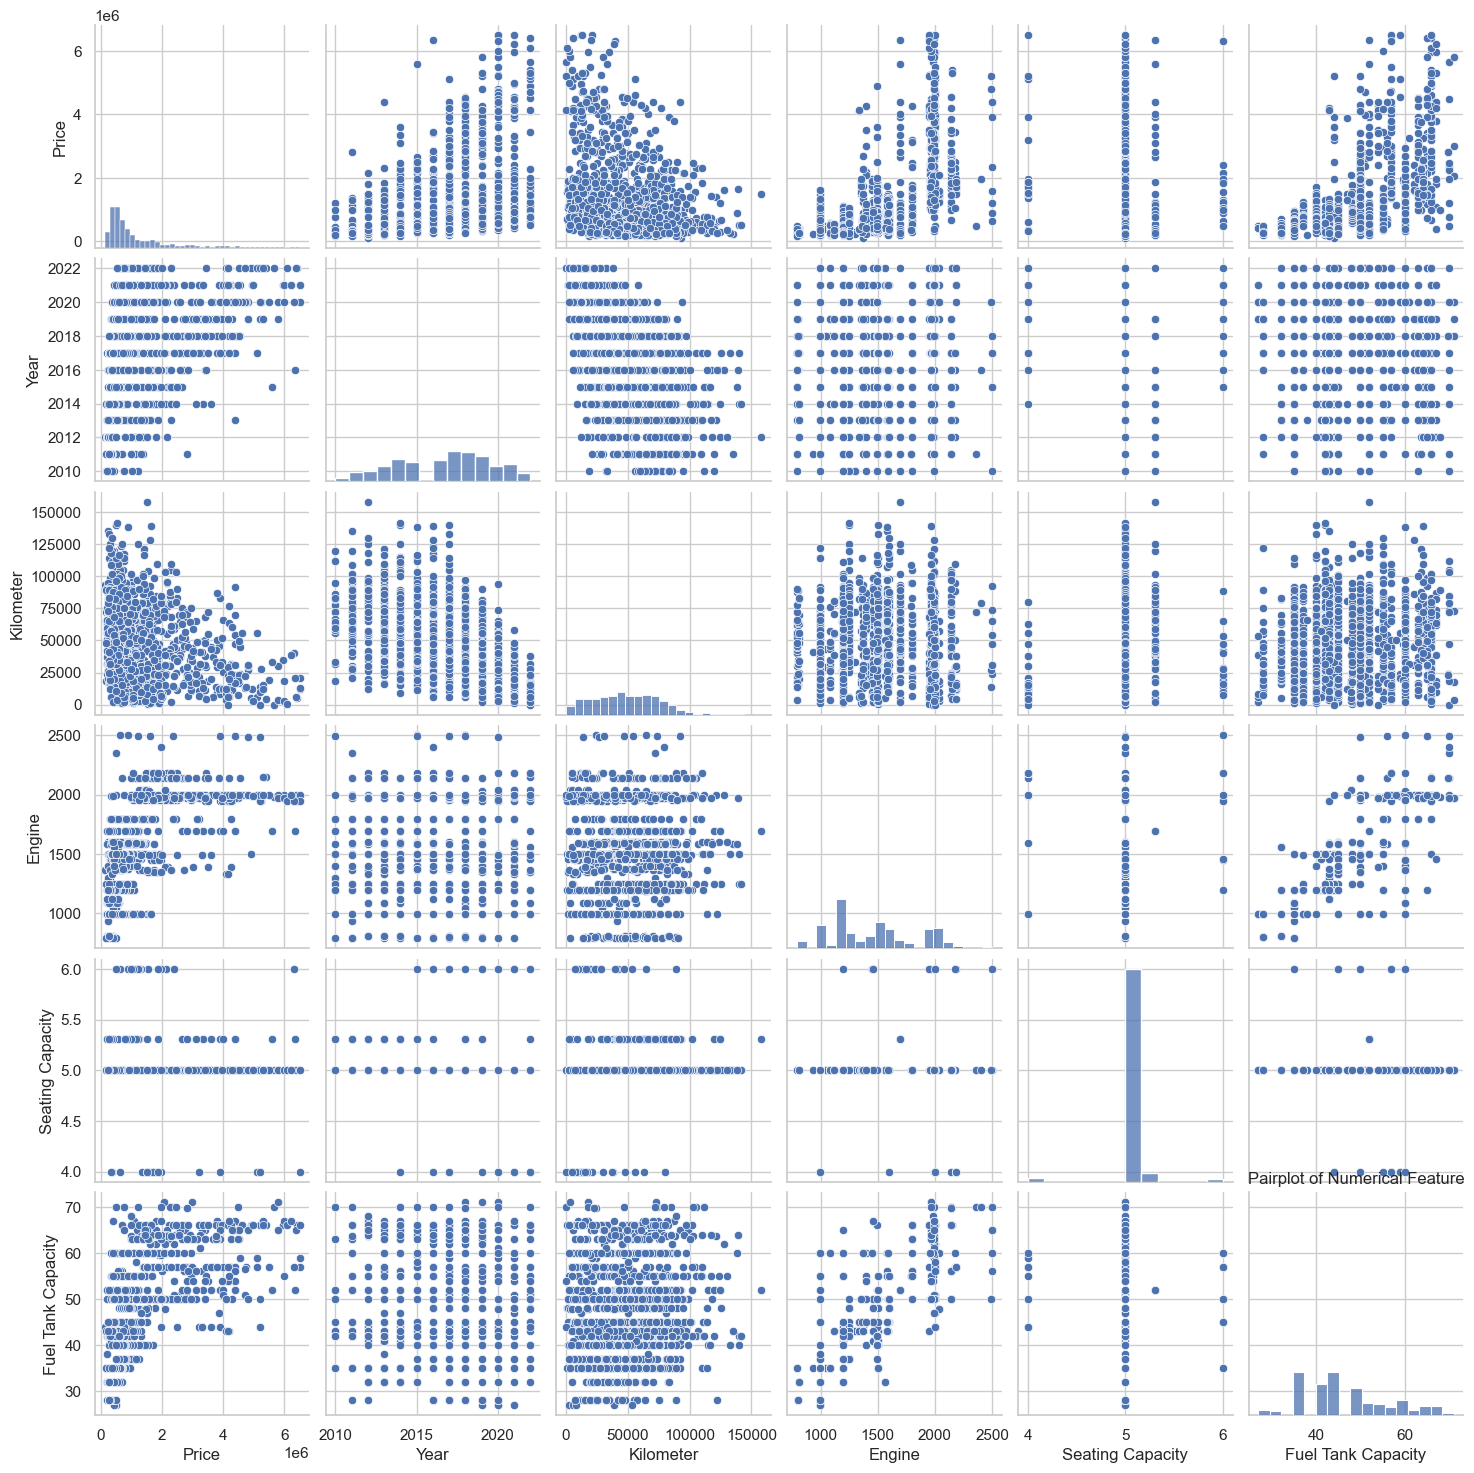

In [300]:
sns.set_theme(style="whitegrid")
sns.pairplot(df_copy[numerical_col])
plt.title('Pairplot of Numerical Feature')
plt.show()

# Data Split

In [301]:
df = df.sample(frac = 1, random_state = 42)
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
609,Audi,3500000,2018,18000,Petrol,Automatic,Mumbai,White,First,Individual,1395.000000,5.000000,54.000000
1771,Porsche,5590000,2015,33000,Diesel,Automatic,Delhi,White,First,Individual,1692.575543,5.306266,52.001542
1990,Maruti Suzuki,400000,2017,43000,CNG,Manual,Agra,Grey,First,Individual,998.000000,5.000000,35.000000
1004,Audi,1400000,2013,60000,Diesel,Automatic,Pune,Grey,Second,Individual,1968.000000,5.000000,65.000000
328,Maruti Suzuki,500000,2017,140000,Diesel,Manual,Warangal,Grey,First,Individual,1248.000000,5.000000,42.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,Honda,790000,2016,63088,Petrol,Manual,Jaipur,White,First,Individual,1497.000000,5.000000,40.000000
1741,Mercedes-Benz,1975000,2015,19000,Petrol,Automatic,Pune,White,First,Individual,1991.000000,5.000000,59.600000
1158,Renault,960000,2018,24000,Diesel,Manual,Bangalore,Brown,First,Individual,1461.000000,5.000000,50.000000
1975,Maruti Suzuki,521000,2017,40879,Petrol,Automatic,Mumbai,Red,First,Individual,1197.000000,5.000000,32.000000


In [302]:
X = df.drop(columns='Price')
y = df['Price']

# Feature Engineering

In [303]:
numerical_col.remove('Price')

In [304]:
scaler = MinMaxScaler()

X[numerical_col] = scaler.fit_transform(X[numerical_col])
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [305]:
lb = LabelEncoder()

for col in categorical_col:
    X[col] = lb.fit_transform(X[col])

In [306]:
X

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
609,0,0.666667,0.113924,6,0,44,14,0,2,0.353079,0.500000,0.613636
1771,19,0.416667,0.208861,2,0,15,14,0,2,0.527610,0.653133,0.568217
1990,16,0.583333,0.272152,0,1,0,7,0,2,0.120235,0.500000,0.181818
1004,0,0.250000,0.379747,2,0,55,7,1,2,0.689150,0.500000,0.863636
328,16,0.583333,0.886076,2,1,73,7,0,2,0.266862,0.500000,0.340909
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,6,0.500000,0.399291,6,1,29,14,0,2,0.412903,0.500000,0.295455
1741,17,0.416667,0.120253,6,0,55,14,0,2,0.702639,0.500000,0.740909
1158,20,0.666667,0.151899,2,1,6,4,0,2,0.391789,0.500000,0.522727
1975,16,0.583333,0.258728,6,0,44,12,0,2,0.236950,0.500000,0.113636


In [307]:
y

array([[0.53014886],
       [0.85747849],
       [0.04463601],
       ...,
       [0.13234156],
       [0.06358668],
       [0.0187942 ]])

# Train-Test Split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [309]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

# Prediction

In [310]:
y_pred = model.predict(X_test)

# Evaluation

In [311]:
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 4. R-Squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R2): {r2}")

# 5. Adjusted R-Squared
# Assuming X_test is your test feature set
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-Squared: {adjusted_r2}")

Mean Absolute Error (MAE): 0.028139787592650286
Mean Squared Error (MSE): 0.002824713774808179
Root Mean Squared Error (RMSE): 0.05314803641535761
R-Squared (R2): 0.8900194111412281
Adjusted R-Squared: 0.8854841291264334


# Actual vs Predictd Graph

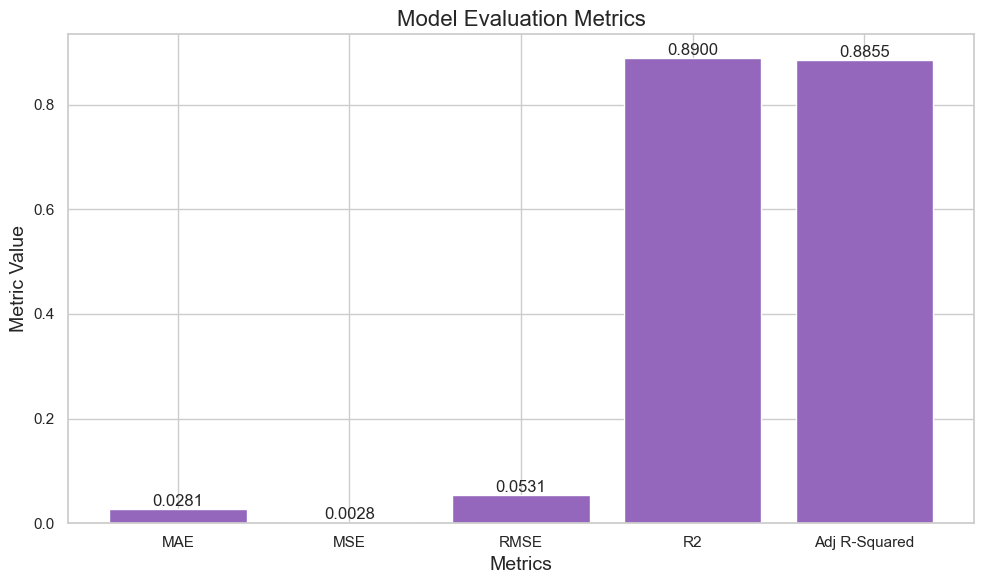

In [312]:
# Metrics (already computed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Prepare data for the bar chart
metric_names = [
    "MAE",
    "MSE",
    "RMSE",
    "R2",
    "Adj R-Squared"
]
metric_values = [mae, mse, rmse, r2, adjusted_r2]

# Creating the vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, metric_values, color='#9467bd')

# Adding value labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position of the label
        bar.get_height(),  # Height of the bar (the value)
        f'{bar.get_height():.4f}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Adding titles and labels
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Metric Value", fontsize=14)
plt.xlabel("Metrics", fontsize=14)

# Displaying the chart with tight layout for better spacing
plt.tight_layout()
plt.show()